<a href="https://colab.research.google.com/github/CryptoRobotFr/easy_backtest/blob/main/review/review1_Ichimoku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://www.youtube.com/watch?v=KE_SAzserLE

In [ ]:
!pip install python-binance ta

<h1> Récupération des données à partir de Binance <h1>

In [ ]:
# Importation des librairies
import pandas as pd
from binance.client import Client
import ta
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Variables pour les données
client = Client()
pair_symbol = "ETHUSDT"
time_interval = Client.KLINE_INTERVAL_1HOUR
start_date = "01 january 2021"

# Récupération des données
klinesT = client.get_historical_klines(pair_symbol, time_interval, start_date)

# Créer un tableau grâce aux données
df = pd.DataFrame(klinesT, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])

# Supprime les colonnes inutiles
df.drop(columns = df.columns.difference(['timestamp','open','high','low','close','volume']), inplace=True)

# Convertit les colonnes en numéric
for col in df.columns:
    df[col] = pd.to_numeric(df[col])

# Convertit les dates dans un format lisible
df = df.set_index(df['timestamp'])
df.index = pd.to_datetime(df.index, unit='ms')
del df['timestamp']

# Affiche le tableau
df

,open,high,low,close,volume
timestamp,,,,,
2021-01-01 00:00:00,736.42,739.00,729.33,734.07,27932.69884
2021-01-01 01:00:00,734.08,749.00,733.37,748.28,52336.18779
2021-01-01 02:00:00,748.27,749.00,742.27,744.06,33019.50100
2021-01-01 03:00:00,744.06,747.23,743.10,744.82,17604.80859
2021-01-01 04:00:00,744.87,747.09,739.30,742.29,18794.15424
...,...,...,...,...,...
2022-03-31 10:00:00,3418.44,3428.00,3410.98,3416.99,14324.73250
2022-03-31 11:00:00,3416.98,3417.45,3400.00,3409.19,11029.47830
2022-03-31 12:00:00,3409.19,3444.83,3403.34,3428.44,21529.07530


<h1> Définition des indicateurs <h1>

In [ ]:
# Ajout de nouvelle colonne dans le tableau représentant nos indicateurs
df['KIJUN'] = ta.trend.ichimoku_base_line(df['high'],df['low'])
df['TENKAN'] = ta.trend.ichimoku_conversion_line(df['high'],df['low'])
df['SSA'] = ta.trend.ichimoku_a(df['high'],df['low'])
df['SSB'] = ta.trend.ichimoku_b(df['high'],df['low'])
df['SSA25'] = ta.trend.ichimoku_a(df['high'],df['low']).shift(25)
df['SSB25'] = ta.trend.ichimoku_b(df['high'],df['low']).shift(25)
df['SSA52'] = ta.trend.ichimoku_a(df['high'],df['low']).shift(50)
df['SSB52'] = ta.trend.ichimoku_b(df['high'],df['low']).shift(50)
df['close25'] = df['close'].shift(25)
df['close1'] = df['close'].shift(1)


# Affiche notre nouveau tableau
df

,open,high,low,close,volume,KIJUN,TENKAN,SSA,SSB,SSA25,SSB25,SSA52,SSB52,close25,close1,SMA200
timestamp,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,736.42,739.00,729.33,734.07,27932.69884,NaN,NaN,NaN,734.165,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 01:00:00,734.08,749.00,733.37,748.28,52336.18779,NaN,NaN,NaN,739.165,NaN,NaN,NaN,NaN,NaN,734.07,NaN
2021-01-01 02:00:00,748.27,749.00,742.27,744.06,33019.50100,NaN,NaN,NaN,739.165,NaN,NaN,NaN,NaN,NaN,748.28,NaN
2021-01-01 03:00:00,744.06,747.23,743.10,744.82,17604.80859,NaN,NaN,NaN,739.165,NaN,NaN,NaN,NaN,NaN,744.06,NaN
2021-01-01 04:00:00,744.87,747.09,739.30,742.29,18794.15424,NaN,NaN,NaN,739.165,NaN,NaN,NaN,NaN,NaN,744.82,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31 10:00:00,3418.44,3428.00,3410.98,3416.99,14324.73250,3397.285,3406.555,3401.9200,3406.855,3390.9950,3392.165,3372.620,3278.585,3387.76,3418.45,3234.866355
2022-03-31 11:00:00,3416.98,3417.45,3400.00,3409.19,11029.47830,3397.285,3406.555,3401.9200,3406.855,3393.3900,3393.810,3388.225,3285.230,3398.56,3416.99,3236.600919
2022-03-31 12:00:00,3409.19,3444.83,3403.34,3428.44,21529.07530,3397.285,3414.970,3406.1275,3406.855,3398.6025,3393.810,3392.925,3285.230,3408.07,3409.19,3238.509765


In [ ]:
dfTest = df.copy()
initial_wallet = 1000 # Somme d'usd au début de la stratégie
taker_fee = 0.0007 # ~ 0.07% de frais sur binance et ftx 

sl_price = 0
tp_price = 1000000

# Initalisation de notre portefeuille
wallet = initial_wallet
usd = initial_wallet
coin = 0

# Initialisation de nos tableaux qui vont contenir nos données d'analyse
trades_hitory = []
days_history = []
previous_day = 0
buy_ready = True

previous_row = df.iloc[0].copy()
#previous_row['close'] < max(row['SSB25'],row['SSA25']) and previous_row['close'] > min(row['SSB25'],row['SSA25']) and

def buy_condition(row, previous_row=None):
    if previous_row['close'] < max(row['SSB25'],row['SSA25']) and previous_row['close'] > min(row['SSB25'],row['SSA25']) and row['close'] > max(row['SSB25'],row['SSA25']) and row["SSA"] > row["SSB"] and row['TENKAN']> row['KIJUN'] and row['close'] > max(row['SSB52'],row['SSA52']):
        return True
    else:
        return False    

def sell_condition(row, previous_row=None):
    if row['close'] >10000000 :
        return True
    else:
        return False  


# Simulation de notre stratégie en parcourant notre tableau ligne par ligne
for index, row in df.iterrows():

    # Garde en mémoire l'évolution de notre portefeuille chaque jour pour pouvoir analyser plus tard
    current_day = index.day
    if previous_day != current_day:
        temp_wallet = wallet
        if coin > 0:
            temp_wallet = coin*row['close']
        days_history.append({
            "day":str(index.year)+"-"+str(index.month)+"-"+str(index.day),
            "wallet":temp_wallet,
            "price":row['close']
        })
    previous_day = current_day

    # Vérifie les conditions si l'on doit acheter
    if buy_condition(row, previous_row) == True and usd > 0 and buy_ready == True:
        # Condition vérifiée, on achète à la clotûre
        coin = usd / row['close']           
        fee = taker_fee * coin             
        coin = coin - fee                   
        usd = 0                            
        wallet = coin * row['close']       
        # Ajout de données pour analyse future
        buy_data = {
            'date': index,
            'position': 'buy',
            'price': row['close'],
            'fee': fee * row['close'],
            'usd': usd,
            'coin': coin,
            'wallet': wallet,
            'reason': "market"
        }
        trades_hitory.append(buy_data)
        sl_price = min(row['SSB25'],row['SSA25']) # A editer si l'on souhaite ajouter un sl
        tp_price = row['close'] + 2*(row['close']-min(row['SSB25'],row['SSA25']))# A editer si l'on souhaite ajouter un tp


    elif row['low'] < sl_price and coin > 0:
        # On vend au prix du stop loss
        usd = coin * sl_price          
        fee = taker_fee * usd               
        usd = usd - fee                     
        coin = 0                           
        wallet = usd                      
        # Ajout de données pour analyse future
        sell_data = {
            'date': index,
            'position': 'sell',
            'price': sl_price,
            'fee': fee,
            'usd': usd,
            'coin': coin,
            'wallet': wallet,
            'reason': "stop loss"           
        }
        trades_hitory.append(sell_data) 
        # buy_ready = False # A commenter si l'on ne veut pas bloquer les prochains achats

    elif row['high'] > tp_price and coin > 0:
        # On vend au prix du stop loss
        usd = coin * tp_price          
        fee = taker_fee * usd               
        usd = usd - fee                     
        coin = 0                           
        wallet = usd                      
        # Ajout de données pour analyse future
        sell_data = {
            'date': index,
            'position': 'sell',
            'price': tp_price,
            'fee': fee,
            'usd': usd,
            'coin': coin,
            'wallet': wallet,
            'reason': "take profit"
                       
        }
        trades_hitory.append(sell_data) 
        # buy_ready = False # A commenter si l'on ne veut pas bloquer les prochains achats

    # Vérifie les conditions si l'on doit vendre
    elif sell_condition(row, previous_row) == True:
        buy_ready = True
        if coin > 0:
            # Condition vérifiée, on vend à la clotûre
            usd = coin * row['close']          
            fee = taker_fee * usd               
            usd = usd - fee                     
            coin = 0                           
            wallet = usd                      
            # Ajout de données pour analyse future
            sell_data = {
                'date': index,
                'position': 'sell',
                'price': row['close'],
                'fee': fee,
                'usd': usd,
                'coin': coin,
                'wallet': wallet,
                'reason': "market"           
            }
            trades_hitory.append(sell_data) 

    previous_row = row

# Convertit en tableau exploitable les données récupérer lors de la simulation
df_days = pd.DataFrame(days_history)
df_days['day'] = pd.to_datetime(df_days['day'])
df_days = df_days.set_index(df_days['day'])

df_trades = pd.DataFrame(trades_hitory)
df_trades['date'] = pd.to_datetime(df_trades['date'])
df_trades = df_trades.set_index(df_trades['date'])

Period: [2021-01-01 00:00:00] -> [2022-03-31 00:00:00]
Initial wallet: 1000.0 $

--- General Information ---
Final wallet: 2712.63 $
Performance vs US dollar: 171.26 %
Worst Drawdown : -11.74%
Buy and hold performance: 363.11 %
Performance vs buy and hold: -41.43 %
Total trades on the period: 29
Global Win rate: 58.62 %
Average Profit: 3.81 %
Total fee: 79.41 $

Best trades: +17.95 % the 2021-07-04 06:00:00
Worst trades: -7.28 % the 2022-02-27 19:00:00

--- Plot wallet evolution vs asset ---


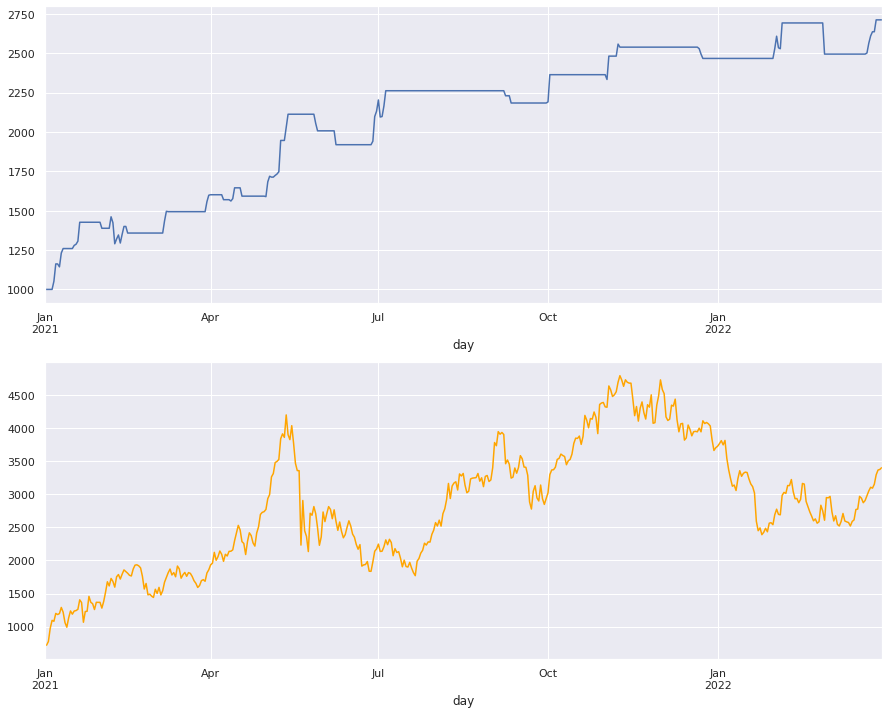

In [ ]:
def plot_bar_by_month(df_days):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    custom_palette = {}
    
    last_month = int(df_days.iloc[-1]['day'].month)
    last_year = int(df_days.iloc[-1]['day'].year)
    
    current_month = int(df_days.iloc[0]['day'].month)
    current_year = int(df_days.iloc[0]['day'].year)
    current_year_array = []
    while current_year != last_year or current_month-1 != last_month:
        date_string = str(current_year) + "-" + str(current_month)
        
        monthly_perf = (df_days.loc[date_string]['wallet'].iloc[-1] - df_days.loc[date_string]['wallet'].iloc[0]) / df_days.loc[date_string]['wallet'].iloc[0]
        monthly_row = {
            'date': str(datetime.date(1900, current_month, 1).strftime('%B')),
            'result': round(monthly_perf*100)
        }
        if monthly_row["result"] >= 0:
            custom_palette[str(datetime.date(1900, current_month, 1).strftime('%B'))] = 'g'
        else:
            custom_palette[str(datetime.date(1900, current_month, 1).strftime('%B'))] = 'r'
        current_year_array.append(monthly_row)
        # print(monthly_perf*100) 
        if ((current_month == 12) or (current_month == last_month and current_year == last_year)):
            current_df = pd.DataFrame(current_year_array)
            # print(current_df)
            g = sns.barplot(data=current_df,x='date',y='result', palette=custom_palette)
            for index, row in current_df.iterrows():
                if row.result >= 0:
                    g.text(row.name,row.result, '+'+str(round(row.result))+'%', color='black', ha="center", va="bottom")
                else:
                    g.text(row.name,row.result, '-'+str(round(row.result))+'%', color='black', ha="center", va="top")
            g.set_title(str(current_year) + ' performance in %')
            g.set(xlabel=current_year, ylabel='performance %')
            
            year_result = (df_days.loc[str(current_year)]['wallet'].iloc[-1] - df_days.loc[str(current_year)]['wallet'].iloc[0]) / df_days.loc[str(current_year)]['wallet'].iloc[0]
            print("----- " + str(current_year) +" Cumulative Performances: " + str(round(year_result*100,2)) + "% -----")
            plt.show()

            current_year_array = []
        
        current_month += 1
        if current_month > 12:
            current_month = 1
            current_year += 1

def plot_wallet_vs_asset(df_days):
    fig, axes = plt.subplots(figsize=(15, 12), nrows=2, ncols=1)
    df_days['wallet'].plot(ax=axes[0])
    df_days['price'].plot(ax=axes[1], color='orange')

def show_analys(days, trades):
    df_trades = trades.copy()
    df_days = days.copy()

    df_days['evolution'] = df_days['wallet'].diff()
    df_trades['trade_result'] = df_trades['wallet'].diff()
    df_trades['trade_result_pct'] = df_trades['wallet'].pct_change()

    df_days['wallet_ath'] = df_days['wallet'].cummax()
    df_days['drawdown'] = df_days['wallet_ath'] - df_days['wallet']
    df_days['drawdown_pct'] = df_days['drawdown'] / df_days['wallet_ath']

    initial_wallet = df_days.iloc[0]["wallet"]

    close_trades = df_trades.loc[df_trades['position'] == 'sell']
    good_trades = close_trades.loc[close_trades['trade_result_pct'] > 0]
    total_trades = len(close_trades)
    total_good_trades = len(good_trades)
    avg_profit = close_trades['trade_result_pct'].mean() 
    global_win_rate = total_good_trades / total_trades
    max_days_drawdown = df_days['drawdown_pct'].max()
    final_wallet = df_days.iloc[-1]['wallet']
    buy_and_hold_pct = (df_days.iloc[-1]['price'] - df_days.iloc[0]['price']) / df_days.iloc[0]['price']
    buy_and_hold_wallet = initial_wallet + initial_wallet * buy_and_hold_pct
    vs_hold_pct = (final_wallet - buy_and_hold_wallet)/buy_and_hold_wallet
    vs_usd_pct = (final_wallet - initial_wallet)/initial_wallet
    total_fee = df_trades['fee'].sum()

    best_trade = df_trades['trade_result_pct'].max()
    best_trade_date =  str(df_trades.loc[df_trades['trade_result_pct'] == best_trade].iloc[0]['date'])
    worst_trade = df_trades['trade_result_pct'].min()
    worst_trade_date =  str(df_trades.loc[df_trades['trade_result_pct'] == worst_trade].iloc[0]['date'])

    print("Period: [{}] -> [{}]".format(df_days.iloc[0]["day"], df_days.iloc[-1]["day"]))
    print("Initial wallet: {} $".format(round(initial_wallet,2)))

    print("\n--- General Information ---")
    print("Final wallet: {} $".format(round(final_wallet,2)))
    print("Performance vs US dollar: {} %".format(round(vs_usd_pct*100,2)))
    print("Worst Drawdown : -{}%".format(round(max_days_drawdown*100, 2)))
    print("Buy and hold performance: {} %".format(round(buy_and_hold_pct*100,2)))
    print("Performance vs buy and hold: {} %".format(round(vs_hold_pct*100,2)))
    print("Total trades on the period: {}".format(total_trades))
    print("Global Win rate: {} %".format(round(global_win_rate*100, 2)))
    print("Average Profit: {} %".format(round(avg_profit*100, 2)))
    print("Total fee: {} $".format(round(total_fee, 2)))

    print("\nBest trades: +{} % the {}".format(round(best_trade*100, 2), best_trade_date))
    print("Worst trades: {} % the {}".format(round(worst_trade*100, 2), worst_trade_date))

# Fonction pour afficher une analyse complète de la stratégie sur le passé
show_analys(df_days.loc[:], df_trades.loc[:])

print("\n--- Plot wallet evolution vs asset ---")
# Fonction pour afficher une analyse complète de la stratégie sur le passé
plot_wallet_vs_asset(df_days.loc[:])

In [ ]:
df_trades[-20:]

,date,position,price,fee,usd,coin,wallet,reason
date,,,,,,,,
2021-09-07 06:00:00,2021-09-07 06:00:00,sell,3905.000,1.562255,2230.231279,0.000000,2230.231279,stop loss
2021-09-10 01:00:00,2021-09-10 01:00:00,buy,3501.040,1.561162,0.000000,0.636574,2228.670117,market
2021-09-10 05:00:00,2021-09-10 05:00:00,sell,3433.790,1.530102,2184.330431,0.000000,2184.330431,stop loss
2021-09-30 12:00:00,2021-09-30 12:00:00,buy,3008.360,1.529031,0.000000,0.725579,2182.801400,market
2021-10-01 12:00:00,2021-10-01 12:00:00,sell,3260.760,1.656156,2364.281262,0.000000,2364.281262,take profit
2021-11-01 19:00:00,2021-11-01 19:00:00,buy,4364.280,1.654997,0.000000,0.541355,2362.626266,market
2021-11-02 23:00:00,2021-11-02 23:00:00,sell,4588.305,1.738732,2482.164662,0.000000,2482.164662,take profit
2021-11-07 00:00:00,2021-11-07 00:00:00,buy,4544.980,1.737515,0.000000,0.545751,2480.427147,market
2021-11-08 00:00:00,2021-11-08 00:00:00,sell,4656.055,1.778733,2539.267701,0.000000,2539.267701,take profit


----- 2021 Cumulative Performances: 146.75% -----


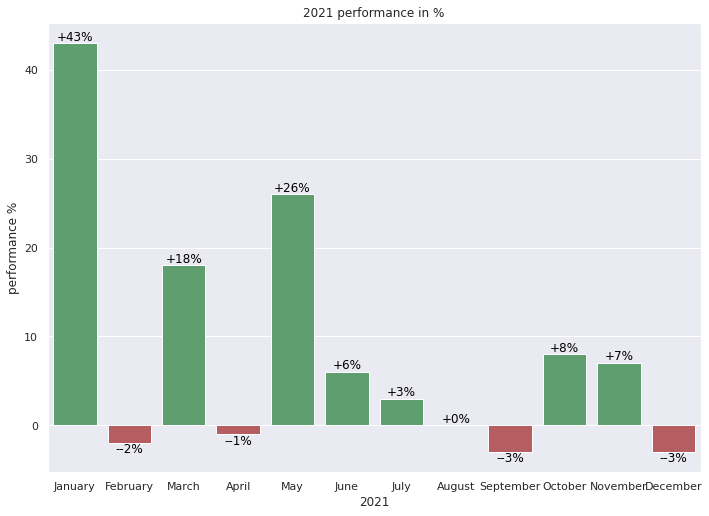

----- 2022 Cumulative Performances: 9.93% -----


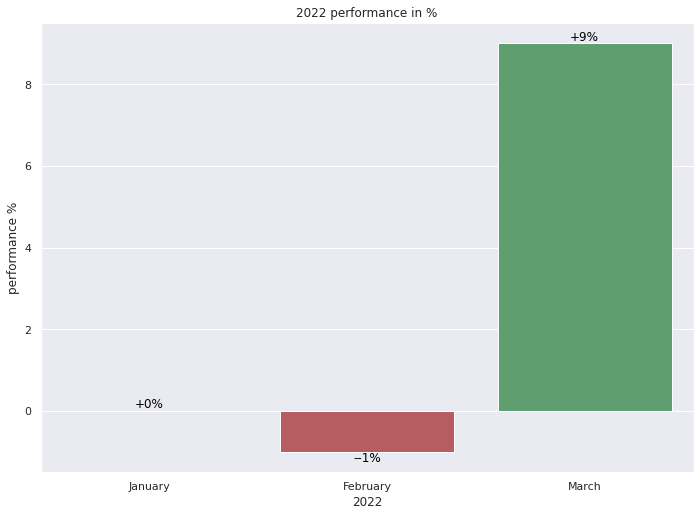

In [ ]:
# Fonction pour afficher les gains et les pertes mois par mois
plot_bar_by_month(df_days.loc[:])